# Impact of Trump super-spreader rallies on COVID-19 deaths in United States #

This project investigates the possible effects of Trump campaign rallies on the spread of COVID-19 during the summer and early fall of 2020.

## Background and Motivation ##

Prior to May 25, 2020, COVID-19 deaths in the United States were falling precipitously. On May 25th, that descent slowed dramatically, and then, around the beginning of July, reversed itself, starting a second wave of COVID-19 deaths in the United States. The number of deaths in this second wave, 125K, now exceeds that of the first wave, 100K.

The date, May 25, 2020, is significant in that it is the date on which George Floyd died while in police custody in Minneapolis, MN. Subsequent to Floyd's death, protests occurred in over 2,000 cities in the United States. It has been suggested that the George Floyd Protests might have contributed to triggering the second wave of COVID-19. 

This "hypothesis" is confounded, however, by summer political campaigning in the run up to the 2020 Elections. In particular, President Trump was notable for holding campaign rallies in which the president did not follow normative behavior to control COVID-19 infections and neither did many of the rally attendees--possibly following the president's lead. These became known as _super-spreader rallies_. Some news agencies have reported that COVID-19 infections spiked in the areas where these rallies had been recently held. However, I have not found a _systematic_ investigation of whether and to what extent the rallies were correlated with COVID-19 spread.

_**The yellow arrows in the two graphs below identify May 26, 2020, that is, the day after George Floyd died while in police custody.**_

### COVID-19 deaths: Seven day moving average ###

![](viz/2020-10-23_original-screen-capture.png)

### COVID-19 deaths: Cumulative ###

![](viz/2020-10-23_accumulated-deaths-anno.png)

## Research Questions and Hypothesis ##

The key question is whether it is possible to identify increases in mortality from COVID-19 subsequent to President Trump's rallies and also relatively proximal to where the rallies were held. And further, to see if these increases are greater than we would expect when compared to changes in COVID-19 mortality during the same times periods in other locations.

My hypothesis is that I _can_ identify increases in COVID-19 mortality associated with President Trump's rallies and that these increases are greater than we would expect based on contemporaneous COVID-19 mortality in other areas.

## Data ##

For data that indicates the spread of COVID-19, I will use the _COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University_ hosted on GitHub at the following URL:

>  <https://github.com/CSSEGISandData/COVID-19>

For data on President Trump's campaign rallies, I will use the list maintained on Wikipedia at the following URL:

>  <https://en.wikipedia.org/wiki/List_of_post-election_Donald_Trump_rallies#2020_campaign_rallies>

## Methodology ##

The Johns-Hopkins data tracks COVID-19 deaths per county in the United States. Using geocoding, I can convert the City-State locations for President Trump's rallies into county locations. I should then be able to gather statistics for each of the counties which are also supported by the Johns-Hopkins data.

I can also gather similar statistics for a set of counties where President Trump did _not_ hold rallies and use these as something analogous to _controls_.

Specifically, the questions that I will investigate are, for each of the Trump rallies:

- What was the change in the seven-day moving average for COVID-19 deaths in the 60 days _**before**_ the date of the Trump rally in that county--and in each of the control counties.
- What was the change in the seven-day moving average for COVID-19 deaths in the 60 days _**after**_ the date of the Trump rally in that county--and in each of the control counties.

- What was the total accumulated COVID-19 deaths in the 60 days _**before**_ the date of the Trump rally in that county--and in each of the control counties.
- What was the total accumulated COVID-19 deaths in the 60 days _**after**_ the date of the Trump rally in that county--and in each of the control counties.

And also:

- Compare summary statistics (mean, median, std) for accumulated COVID-19 deaths in the Trump counties vs the control counties.

To be clear, I will look at COVID-19 deaths in the control counties before and after the date of each Trump rally _even though no Trump rally occurred in that county_.

# Deaths vs Infections ("Cases") #

Early feedback questioned measuring deaths vs infections aka "cases".

I chose to measure deaths because a "case" is typically defined simply as a positive test result. Therefore, the term case is a bit misleading in that it _seems_ to imply that someone is sick, but actually it doesn't even imply that someone is contagious or even that they are recently infected. An individual could have been infected by COVID-19 months earlier, been mostly (or perhaps completely) asymptomatic and therefore not even known that they were infected. Much later, the are tested and show up as positive. The irony of such cases is that not only is the individual not a danger to others, they actually make the community safer by virtue of their immunity.

## Unknowns that could affect the results ##

I have, so far, identified a couple unknowns that could affect the success of this investigation.

- **We don’t know how many people were at each rally.** There could be a lot of variability there, and the number of people at the rally is (almost certainly) an important factor in how many people contract the virus at the rally and therefore how much the virus could spread in the aftermath of the rally.
- **We don’t know if the people who attended a rally resided in the county where the rally was held.** They might have traveled there and then gone back home afterwards . . . and infected people in their home county. The subsequent deaths would then show up in that county rather than the one in which the rally was held. 
- **Trump's rallies are not uniformly distributed across the United States.** This could be for reasons such as campaign strategy. But in any case, regional differences between areas that hosted the rallies and those that didn't could introduce bias into the data. These differences could include local and state policies with respect to behaviors, such as masking, that affect the spread of COVID-19. Also, on a more subtle level, regional differences in culture could also affect viral spread. Some areas, irrespective of official policies, might be more or less likely to spread the vius. For example, the culture in Seattle, WA has a reputation for being somewhat insular. Early in the pandemic, the (relatively) slow community spread in Seattle was attributed to this cultural characteristic.

# Import required packages #

In [21]:
import os
import datetime
import re
import geocoder
import numpy as np
import pandas as pd
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt

Import constants

In [22]:
import constants

In [23]:
#
# Note that the BING_API_KEY variable needs to be set with your API key
# in the console window from which you launch this Jupyter notebook.
#
g = geocoder.bing( 'Kenosha,s WI', key=os.environ[ 'BING_API_KEY' ] )

print( g.json[ 'raw' ][ 'address' ][ 'adminDistrict2' ] )

Kenosha County


In [24]:
trump_rallies = pd.read_csv('data/trump-rallies.csv', 
        sep=',', 
        comment='#',
        skipinitialspace=True,
        header=0,
        na_values='?')

In [25]:
trump_rallies.columns

Index(['Date', 'City', 'State'], dtype='object')

In [26]:
trump_rallies.head()

,Date,City,State
0,2020-06-20,Tulsa,OK
1,2020-06-23,Phoenix,AZ
2,2020-08-17,Mankato,MN
3,2020-08-17,Oshkosh,WI
4,2020-08-18,Yuma,AZ


In [27]:
trump_rallies.tail()

,Date,City,State
63,2020-11-02,Fayetteville,NC
64,2020-11-02,Scranton,PA
65,2020-11-02,Traverse City,MI
66,2020-11-02,Kenosha,WI
67,2020-11-02,Grand Rapids,MI


In [28]:
trump_rallies.shape

(68, 3)

In [29]:
target_location = trump_rallies.loc[ 0, "City" ] + ", " + trump_rallies.loc[ 0, "State" ]
target_location

'Tulsa, OK'

In [30]:
g = geocoder.bing( target_location, key=os.environ[ 'BING_API_KEY' ] )
g.json[ 'raw' ][ 'address' ][ 'adminDistrict2' ] 

'Tulsa County'

In [31]:
geocoder.bing( 'Newport News' + ", " + 'VA', key=os.environ[ 'BING_API_KEY' ] ).json[ 'raw' ]

{'__type': 'Location:http://schemas.microsoft.com/search/local/ws/rest/v1',
 'bbox': [36.95943832397461,
  -76.6280288696289,
  37.22066116333008,
  -76.3875732421875],
 'name': 'Newport News, VA',
 'point': {'type': 'Point',
  'coordinates': [36.97771453857422, -76.43035125732422]},
 'address': {'adminDistrict': 'VA',
  'adminDistrict2': 'Newport News City',
  'countryRegion': 'United States',
  'formattedAddress': 'Newport News, VA',
  'locality': 'Newport News'},
 'confidence': 'High',
 'entityType': 'PopulatedPlace',
 'geocodePoints': [{'type': 'Point',
   'coordinates': [36.97771453857422, -76.43035125732422],
   'calculationMethod': 'Rooftop',
   'usageTypes': ['Display']}],
 'matchCodes': ['Ambiguous']}

In [32]:
geocoder.bing( 'Newport News' + ", " + 'VA', key=os.environ[ 'BING_API_KEY' ] ).json[ 'raw' ][ 'address' ]

{'adminDistrict': 'VA',
 'adminDistrict2': 'Newport News City',
 'countryRegion': 'United States',
 'formattedAddress': 'Newport News, VA',
 'locality': 'Newport News'}

In [33]:
def gcode( row ):
    g = geocoder.bing( row[ 'City' ] + ", " + row[ 'State' ], key=os.environ[ 'BING_API_KEY' ] )
    if 'adminDistrict2' in g.json[ 'raw' ][ 'address' ]:
        county = g.json[ 'raw' ][ 'address' ][ 'adminDistrict2' ] 
        return( county )
    else:
        return( 'Sumpter County' )


In [34]:
trump_rallies[ 'County' ] = trump_rallies.apply( gcode, axis = 1 )

In [35]:
trump_rallies.loc[ : , 'County' ].head()

0         Tulsa County
1      Maricopa County
2    Blue Earth County
3     Winnebago County
4          Yuma County
Name: County, dtype: object

In [36]:
trump_rallies.loc[ : , 'County' ].tail()

63        Cumberland County
64        Lackawanna County
65    Grand Traverse County
66           Kenosha County
67              Kent County
Name: County, dtype: object

# Read time series data from Johns-Hopkins COVID-19 repository #

In [37]:
covid_19_time_series_by_county = pd.read_csv('data/time_series_covid19_deaths_US.csv', 
        sep=',', 
        comment='#',
        skipinitialspace=True,
        header=0,
        na_values='?')

In [38]:
covid_19_time_series_by_county.shape

(3340, 324)

In [39]:
covid_19_time_series_by_county.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,39,39,39,39,39,39,41,42,42,42
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,84,84,84,84,84,84,98,98,98,98
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,10,10,10,10,10,10,10,10,10,10
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,18,18,17,17,17,17,17,17,17,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,35,35,36,36,36,36,39,40,40,40


In [40]:
covid_19_time_series_by_county.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,2,2,2,2,2,2,2,2,2,2
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,4,4,4,4,4,4,4,4,4,4
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,7,7,7,7,7,7,8,8,8,8
3339,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,0,0,0,0,1,1,1,1,1,1


Most of the columns are the COVID-19 deaths for a given date. Show the non-date columns.

In [41]:
covid_19_time_series_by_county.columns.array[ 0:12 ]

<PandasArray>
[           'UID',           'iso2',           'iso3',          'code3',
           'FIPS',         'Admin2', 'Province_State', 'Country_Region',
            'Lat',          'Long_',   'Combined_Key',     'Population']
Length: 12, dtype: object

The `Admin2` column contains the county. There are many duplicates in that column; we can't merge on it.

In [42]:
len( covid_19_time_series_by_county.loc[ :, 'Admin2' ] ) 

3340

In [43]:
len( covid_19_time_series_by_county.loc[ :, 'Admin2' ].unique() )

1979

The `Combined_Key` column provides a _primary key_ that uniquely identifies the row.

In [44]:
covid_19_time_series_by_county.loc[ :, 'Combined_Key' ]

0          Autauga, Alabama, US
1          Baldwin, Alabama, US
2          Barbour, Alabama, US
3             Bibb, Alabama, US
4           Blount, Alabama, US
                 ...           
3335         Teton, Wyoming, US
3336         Uinta, Wyoming, US
3337    Unassigned, Wyoming, US
3338      Washakie, Wyoming, US
3339        Weston, Wyoming, US
Name: Combined_Key, Length: 3340, dtype: object

Remove unneeded columns.

In [45]:
covid_19_time_series_by_county.drop( [ 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region' ] , axis = 1, inplace = True )

In [46]:
covid_19_time_series_by_county.head()

,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
0,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,...,39,39,39,39,39,39,41,42,42,42
1,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,...,84,84,84,84,84,84,98,98,98,98
2,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
3,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,...,18,18,17,17,17,17,17,17,17,17
4,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,...,35,35,36,36,36,36,39,40,40,40


# Synthesize a key for the Trump rallies dataframe to use for merging #

Read in a dataset that maps from state names to state abbreviations.

In [47]:
state_abbr = pd.read_csv('data/state-abbr.csv', 
        sep=',', 
        comment='#',
        skipinitialspace=True,
        header=0,
        na_values='?')

In [48]:
state_abbr.head()

,State,Abbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [49]:
state_abbr.tail()

,State,Abbr
45,Virginia,VA
46,Washington,WA
47,West Virginia,WV
48,Wisconsin,WI
49,Wyoming,WY


Create a dictionary from the two columns of our state/abbr dataframe.

In [50]:
map_abbr_state = dict( zip( state_abbr.Abbr.str.strip(), state_abbr.State.str.strip() ) )

In [51]:
map_abbr_state.keys()

dict_keys(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])

In [52]:
map_abbr_state[ 'VA' ]

'Virginia'

In [53]:
def create_combined_key_for_trump( row ):
    combined = row[ 'County' ][ 0:-6 ].rstrip() + ", " + map_abbr_state[ row[ 'State' ] ] + ", " + 'US'
    return combined

trump_rallies[ 'Combined_Key' ] = trump_rallies.apply( create_combined_key_for_trump, axis = 1 )

In [54]:
trump_rallies[ 'Combined_Key' ].head()

0          Tulsa, Oklahoma, US
1        Maricopa, Arizona, US
2    Blue Earth, Minnesota, US
3     Winnebago, Wisconsin, US
4            Yuma, Arizona, US
Name: Combined_Key, dtype: object

In [55]:
trump_rallies.head()

,Date,City,State,County,Combined_Key
0,2020-06-20,Tulsa,OK,Tulsa County,"Tulsa, Oklahoma, US"
1,2020-06-23,Phoenix,AZ,Maricopa County,"Maricopa, Arizona, US"
2,2020-08-17,Mankato,MN,Blue Earth County,"Blue Earth, Minnesota, US"
3,2020-08-17,Oshkosh,WI,Winnebago County,"Winnebago, Wisconsin, US"
4,2020-08-18,Yuma,AZ,Yuma County,"Yuma, Arizona, US"


# Merge Trump rallies data with COVID-19 data #

In [56]:
trump_rallies = trump_rallies.merge( covid_19_time_series_by_county, how = "left", on = "Combined_Key")

In [57]:
trump_rallies.columns

Index(['Date', 'City', 'State', 'County', 'Combined_Key', 'Lat', 'Long_',
       'Population', '1/22/20', '1/23/20',
       ...
       '11/19/20', '11/20/20', '11/21/20', '11/22/20', '11/23/20', '11/24/20',
       '11/25/20', '11/26/20', '11/27/20', '11/28/20'],
      dtype='object', length=320)

In [58]:
trump_rallies.shape

(68, 320)

In [59]:
trump_rallies.head()

,Date,City,State,County,Combined_Key,Lat,Long_,Population,1/22/20,1/23/20,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
0,2020-06-20,Tulsa,OK,Tulsa County,"Tulsa, Oklahoma, US",36.119396,-95.940139,651552.0,0.0,0.0,...,246.0,248.0,254.0,254.0,257.0,258.0,260.0,260.0,264.0,265.0
1,2020-06-23,Phoenix,AZ,Maricopa County,"Maricopa, Arizona, US",33.348359,-112.491815,4485414.0,0.0,0.0,...,3850.0,3878.0,3890.0,3896.0,3896.0,3922.0,3927.0,3955.0,3966.0,3974.0
2,2020-08-17,Mankato,MN,Blue Earth County,"Blue Earth, Minnesota, US",44.035542,-94.066998,67653.0,0.0,0.0,...,12.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,13.0,14.0
3,2020-08-17,Oshkosh,WI,Winnebago County,"Winnebago, Wisconsin, US",44.068869,-88.644771,171907.0,0.0,0.0,...,102.0,105.0,105.0,105.0,105.0,108.0,108.0,110.0,110.0,111.0
4,2020-08-18,Yuma,AZ,Yuma County,"Yuma, Arizona, US",32.768957,-113.906667,213787.0,0.0,0.0,...,369.0,371.0,375.0,375.0,375.0,377.0,378.0,380.0,380.0,388.0


In [60]:
trump_rallies.tail(10)

,Date,City,State,County,Combined_Key,Lat,Long_,Population,1/22/20,1/23/20,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
58,2020-11-01,Washington,MI,Macomb County,"Macomb, Michigan, US",42.691584,-82.927528,873972.0,0.0,0.0,...,1193.0,1203.0,1213.0,1213.0,1217.0,1232.0,1236.0,1236.0,1253.0,1267.0
59,2020-11-01,Dubuque,IA,Dubuque County,"Dubuque, Iowa, US",42.468153,-90.881819,97311.0,0.0,0.0,...,89.0,89.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0
60,2020-11-01,Hickory,NC,Catawba County,"Catawba, North Carolina, US",35.662111,-81.213262,159551.0,0.0,0.0,...,76.0,79.0,80.0,80.0,80.0,84.0,85.0,85.0,85.0,85.0
61,2020-11-01,Rome,GA,Floyd County,"Floyd, Georgia, US",34.262683,-85.215774,98498.0,0.0,0.0,...,73.0,74.0,75.0,75.0,75.0,77.0,78.0,81.0,82.0,82.0
62,2020-11-01,Opa-locka,FL,Miami-Dade County,"Miami-Dade, Florida, US",25.611236,-80.551706,2716940.0,0.0,0.0,...,3738.0,3746.0,3753.0,3766.0,3782.0,3789.0,3792.0,3792.0,3799.0,3823.0
63,2020-11-02,Fayetteville,NC,Cumberland County,"Cumberland, North Carolina, US",35.047621,-78.826232,335509.0,0.0,0.0,...,109.0,109.0,109.0,110.0,110.0,111.0,112.0,112.0,115.0,115.0
64,2020-11-02,Scranton,PA,Lackawanna County,"Lackawanna, Pennsylvania, US",41.435647,-75.603792,209674.0,0.0,0.0,...,229.0,230.0,230.0,230.0,230.0,230.0,231.0,231.0,231.0,231.0
65,2020-11-02,Traverse City,MI,Grand Traverse County,"Grand Traverse, Michigan, US",44.695656,-85.555852,93088.0,0.0,0.0,...,17.0,17.0,18.0,18.0,18.0,19.0,19.0,19.0,19.0,19.0
66,2020-11-02,Kenosha,WI,Kenosha County,"Kenosha, Wisconsin, US",42.576394,-88.040517,169561.0,0.0,0.0,...,122.0,123.0,125.0,126.0,127.0,134.0,142.0,144.0,145.0,145.0
67,2020-11-02,Grand Rapids,MI,Kent County,"Kent, Michigan, US",43.031977,-85.549346,656955.0,0.0,0.0,...,277.0,285.0,292.0,292.0,301.0,312.0,312.0,312.0,336.0,344.0


# Derive a table that has only the COVID-19 deaths by rally location #

Drop columns that are unecessary for this table

In [61]:
covid_19_deaths_by_rally = trump_rallies.drop( ["Date", "City", "State", "County", "Lat", "Long_", "Population" ], axis = 1 )
covid_19_deaths_by_rally.head()

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20
0,"Tulsa, Oklahoma, US",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.0,248.0,254.0,254.0,257.0,258.0,260.0,260.0,264.0,265.0
1,"Maricopa, Arizona, US",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3850.0,3878.0,3890.0,3896.0,3896.0,3922.0,3927.0,3955.0,3966.0,3974.0
2,"Blue Earth, Minnesota, US",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,13.0,14.0
3,"Winnebago, Wisconsin, US",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,102.0,105.0,105.0,105.0,105.0,108.0,108.0,110.0,110.0,111.0
4,"Yuma, Arizona, US",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,369.0,371.0,375.0,375.0,375.0,377.0,378.0,380.0,380.0,388.0


Trump visited the following counties twice, which creates duplicate rows in the dataframe.

- Maricopa, Arizona, US
- Douglas, Nevada, US
- Cumberland, North Carolina, US

Drop those duplicate rows.

In [62]:
len( covid_19_deaths_by_rally ) - len( covid_19_deaths_by_rally.drop_duplicates() )

4

In [63]:
covid_19_deaths_by_rally.drop_duplicates( inplace = True )
len( covid_19_deaths_by_rally ) - len( covid_19_deaths_by_rally.drop_duplicates() )

0

Dropping rows leaves gaps in the index. For example, note that `29` is missing below. Renumber the index.

In [64]:
covid_19_deaths_by_rally.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52,
            53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67],
           dtype='int64')

In [65]:
covid_19_deaths_by_rally.set_index( pd.Int64Index( range( covid_19_deaths_by_rally.shape[ 0 ] ) ), inplace = True )
covid_19_deaths_by_rally.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
           dtype='int64')

Swap the rows and columns

In [66]:
covid_19_deaths_by_rally = covid_19_deaths_by_rally.transpose()
covid_19_deaths_by_rally.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Combined_Key,"Tulsa, Oklahoma, US","Maricopa, Arizona, US","Blue Earth, Minnesota, US","Winnebago, Wisconsin, US","Yuma, Arizona, US","Lackawanna, Pennsylvania, US","Rockingham, New Hampshire, US","Westmoreland, Pennsylvania, US","Forsyth, North Carolina, US","Saginaw, Michigan, US",...,"Butler, Pennsylvania, US","Lycoming, Pennsylvania, US","Macomb, Michigan, US","Dubuque, Iowa, US","Catawba, North Carolina, US","Floyd, Georgia, US","Miami-Dade, Florida, US","Grand Traverse, Michigan, US","Kenosha, Wisconsin, US","Kent, Michigan, US"
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Use the first row as the column labels

In [67]:
covid_19_deaths_by_rally.columns = covid_19_deaths_by_rally.iloc[0]
covid_19_deaths_by_rally.drop(covid_19_deaths_by_rally.index[0], inplace = True )
covid_19_deaths_by_rally.head()

Combined_Key,"Tulsa, Oklahoma, US","Maricopa, Arizona, US","Blue Earth, Minnesota, US","Winnebago, Wisconsin, US","Yuma, Arizona, US","Lackawanna, Pennsylvania, US","Rockingham, New Hampshire, US","Westmoreland, Pennsylvania, US","Forsyth, North Carolina, US","Saginaw, Michigan, US",...,"Butler, Pennsylvania, US","Lycoming, Pennsylvania, US","Macomb, Michigan, US","Dubuque, Iowa, US","Catawba, North Carolina, US","Floyd, Georgia, US","Miami-Dade, Florida, US","Grand Traverse, Michigan, US","Kenosha, Wisconsin, US","Kent, Michigan, US"
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Fix up name of first column. View the tail of the dataframe so we can see the number of deaths at the end of the time interval.

In [68]:
covid_19_deaths_by_rally.columns.name = ""
covid_19_deaths_by_rally.tail()

,"Tulsa, Oklahoma, US","Maricopa, Arizona, US","Blue Earth, Minnesota, US","Winnebago, Wisconsin, US","Yuma, Arizona, US","Lackawanna, Pennsylvania, US","Rockingham, New Hampshire, US","Westmoreland, Pennsylvania, US","Forsyth, North Carolina, US","Saginaw, Michigan, US",...,"Butler, Pennsylvania, US","Lycoming, Pennsylvania, US","Macomb, Michigan, US","Dubuque, Iowa, US","Catawba, North Carolina, US","Floyd, Georgia, US","Miami-Dade, Florida, US","Grand Traverse, Michigan, US","Kenosha, Wisconsin, US","Kent, Michigan, US"
11/24/20,258,3922,11,108,377,230,105,172,158,221,...,63,35,1232,90,84,77,3789,19,134,312
11/25/20,260,3927,12,108,378,231,105,179,163,223,...,69,36,1236,91,85,78,3792,19,142,312
11/26/20,260,3955,12,110,380,231,105,186,163,223,...,70,38,1236,91,85,81,3792,19,144,312
11/27/20,264,3966,13,110,380,231,106,187,164,225,...,70,38,1253,91,85,82,3799,19,145,336
11/28/20,265,3974,14,111,388,231,108,192,164,225,...,71,38,1267,91,85,82,3823,19,145,344


The Trump rallies dataframe uses dates in ISO 8601 format. Convert the dates in the COVID-19 deaths table to use the same format.

In [69]:
def convert_to_iso( string ):
    m = re.match( '(\d*)/(\d*)/(\d*)', string )
    my_date = datetime.date( int( '20' + m.group( 3 ) ), int( m.group( 1 ) ), int( m.group( 2 ) ) )
    return( my_date.isoformat() )

date_index = covid_19_deaths_by_rally.index
iso_index = date_index.map( convert_to_iso )
covid_19_deaths_by_rally.index = iso_index

In [70]:
covid_19_deaths_by_rally.head()

,"Tulsa, Oklahoma, US","Maricopa, Arizona, US","Blue Earth, Minnesota, US","Winnebago, Wisconsin, US","Yuma, Arizona, US","Lackawanna, Pennsylvania, US","Rockingham, New Hampshire, US","Westmoreland, Pennsylvania, US","Forsyth, North Carolina, US","Saginaw, Michigan, US",...,"Butler, Pennsylvania, US","Lycoming, Pennsylvania, US","Macomb, Michigan, US","Dubuque, Iowa, US","Catawba, North Carolina, US","Floyd, Georgia, US","Miami-Dade, Florida, US","Grand Traverse, Michigan, US","Kenosha, Wisconsin, US","Kent, Michigan, US"
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Remove the COVID-19 deaths from the Trump rallies table #

In [71]:
trump_rallies.drop( trump_rallies.iloc[:, 8:], axis = 1, inplace = True )
trump_rallies.head()

,Date,City,State,County,Combined_Key,Lat,Long_,Population
0,2020-06-20,Tulsa,OK,Tulsa County,"Tulsa, Oklahoma, US",36.119396,-95.940139,651552.0
1,2020-06-23,Phoenix,AZ,Maricopa County,"Maricopa, Arizona, US",33.348359,-112.491815,4485414.0
2,2020-08-17,Mankato,MN,Blue Earth County,"Blue Earth, Minnesota, US",44.035542,-94.066998,67653.0
3,2020-08-17,Oshkosh,WI,Winnebago County,"Winnebago, Wisconsin, US",44.068869,-88.644771,171907.0
4,2020-08-18,Yuma,AZ,Yuma County,"Yuma, Arizona, US",32.768957,-113.906667,213787.0


In [72]:
trump_rallies[ trump_rallies.Date == "2020-08-17" ]

,Date,City,State,County,Combined_Key,Lat,Long_,Population
2,2020-08-17,Mankato,MN,Blue Earth County,"Blue Earth, Minnesota, US",44.035542,-94.066998,67653.0
3,2020-08-17,Oshkosh,WI,Winnebago County,"Winnebago, Wisconsin, US",44.068869,-88.644771,171907.0


In [73]:
trump_rallies.loc[ 2, 'Combined_Key' ]

'Blue Earth, Minnesota, US'

The time series data from Johns-Hopkins is cumulative. We want the number of deaths on a particular day, rather than the total number of deaths up until that day. Use the `.diff()` method to the differences between each row in the dataframe.

In [74]:
covid_19_deaths_by_rally_no_accumulate = covid_19_deaths_by_rally.diff(periods=1, axis=0)

In [75]:
covid_19_deaths_by_rally.tail()

,"Tulsa, Oklahoma, US","Maricopa, Arizona, US","Blue Earth, Minnesota, US","Winnebago, Wisconsin, US","Yuma, Arizona, US","Lackawanna, Pennsylvania, US","Rockingham, New Hampshire, US","Westmoreland, Pennsylvania, US","Forsyth, North Carolina, US","Saginaw, Michigan, US",...,"Butler, Pennsylvania, US","Lycoming, Pennsylvania, US","Macomb, Michigan, US","Dubuque, Iowa, US","Catawba, North Carolina, US","Floyd, Georgia, US","Miami-Dade, Florida, US","Grand Traverse, Michigan, US","Kenosha, Wisconsin, US","Kent, Michigan, US"
2020-11-24,258,3922,11,108,377,230,105,172,158,221,...,63,35,1232,90,84,77,3789,19,134,312
2020-11-25,260,3927,12,108,378,231,105,179,163,223,...,69,36,1236,91,85,78,3792,19,142,312
2020-11-26,260,3955,12,110,380,231,105,186,163,223,...,70,38,1236,91,85,81,3792,19,144,312
2020-11-27,264,3966,13,110,380,231,106,187,164,225,...,70,38,1253,91,85,82,3799,19,145,336
2020-11-28,265,3974,14,111,388,231,108,192,164,225,...,71,38,1267,91,85,82,3823,19,145,344


In [76]:
covid_19_deaths_by_rally_no_accumulate.tail()

,"Tulsa, Oklahoma, US","Maricopa, Arizona, US","Blue Earth, Minnesota, US","Winnebago, Wisconsin, US","Yuma, Arizona, US","Lackawanna, Pennsylvania, US","Rockingham, New Hampshire, US","Westmoreland, Pennsylvania, US","Forsyth, North Carolina, US","Saginaw, Michigan, US",...,"Butler, Pennsylvania, US","Lycoming, Pennsylvania, US","Macomb, Michigan, US","Dubuque, Iowa, US","Catawba, North Carolina, US","Floyd, Georgia, US","Miami-Dade, Florida, US","Grand Traverse, Michigan, US","Kenosha, Wisconsin, US","Kent, Michigan, US"
2020-11-24,1,26,0,3,2,0,0,5,1,13,...,6,0,15,0,4,2,7,1,7,11
2020-11-25,2,5,1,0,1,1,0,7,5,2,...,6,1,4,1,1,1,3,0,8,0
2020-11-26,0,28,0,2,2,0,0,7,0,0,...,1,2,0,0,0,3,0,0,2,0
2020-11-27,4,11,1,0,0,0,1,1,1,2,...,0,0,17,0,0,1,7,0,1,24
2020-11-28,1,8,1,1,8,0,2,5,0,0,...,1,0,14,0,0,0,24,0,0,8


In [77]:
covid_19_deaths_by_rally.loc[ trump_rallies.loc[ 2, 'Date'], trump_rallies.loc[ 2, 'Combined_Key'] ]

5.0

In [78]:
covid_19_deaths_by_rally.loc[ :, trump_rallies.loc[ 2, 'Combined_Key'] ].max()

14.0

In [79]:
my_date = datetime.date(2020, 12,14)
time_interval = datetime.timedelta( days = constants.TIME_INTERVAL )

rally_date_str = trump_rallies.loc[ 1, 'Date']

before_date_str = ( my_date.fromisoformat( rally_date_str ) - time_interval ).isoformat()
after_date_str = ( my_date.fromisoformat( rally_date_str ) + time_interval ).isoformat()

Deaths each day for `TIME_INTERVAL` days _prior_ to Trump's rally.

In [80]:
covid_19_deaths_by_rally_no_accumulate.loc[ :, trump_rallies.loc[ 0, 'Combined_Key'] ].loc[ before_date_str:rally_date_str ]

2020-05-19    0
2020-05-20    2
2020-05-21    1
2020-05-22    1
2020-05-23    3
2020-05-24    0
2020-05-25    0
2020-05-26    3
2020-05-27    2
2020-05-28    0
2020-05-29    2
2020-05-30    3
2020-05-31    0
2020-06-01    0
2020-06-02    3
2020-06-03    0
2020-06-04    2
2020-06-05    0
2020-06-06    0
2020-06-07    1
2020-06-08    0
2020-06-09    1
2020-06-10    0
2020-06-11    1
2020-06-12    0
2020-06-13    0
2020-06-14    0
2020-06-15    0
2020-06-16    2
2020-06-17    0
2020-06-18    1
2020-06-19    0
2020-06-20    1
2020-06-21    0
2020-06-22    0
2020-06-23    0
Name: Tulsa, Oklahoma, US, dtype: object

In [81]:
covid_19_deaths_by_rally_no_accumulate.loc[ :, trump_rallies.loc[ 0, 'Combined_Key'] ].loc[ before_date_str:rally_date_str ].sum()

29.0

In [82]:
covid_19_deaths_by_rally_no_accumulate.loc[ :, trump_rallies.loc[ 1, 'Combined_Key'] ].loc[ before_date_str:rally_date_str ].sum()

339.0

In [83]:
covid_19_deaths_by_rally_no_accumulate.loc[ :, trump_rallies.loc[ 48, 'Combined_Key'] ].loc[ before_date_str:rally_date_str ].sum()

47.0

In [84]:
covid_19_deaths_by_rally_no_accumulate.loc[ :, trump_rallies.loc[ 2, 'Combined_Key'] ].loc[ before_date_str:rally_date_str ].sum()

2.0

In [85]:
covid_19_deaths_by_rally_no_accumulate.loc[ :, trump_rallies.loc[ 3, 'Combined_Key'] ].loc[ before_date_str:rally_date_str ].sum()

10.0

In [86]:
covid_19_deaths_by_rally_no_accumulate.loc[ :, trump_rallies.loc[ 4, 'Combined_Key'] ].loc[ before_date_str:rally_date_str ].sum()

64.0

In [87]:
def deaths_prior( row ):
    time_interval = datetime.timedelta( days = constants.TIME_INTERVAL )
    rally_date_str = row[ 'Date'] 
    before_date_str = ( my_date.fromisoformat( rally_date_str ) - time_interval ).isoformat()
    return( covid_19_deaths_by_rally_no_accumulate.loc[ :, row[ 'Combined_Key' ] ].loc[ before_date_str:rally_date_str ].sum() )

trump_rallies[ "deaths_prior" ] = trump_rallies.apply( deaths_prior, axis = 1 )

In [88]:
def deaths_after( row ):
    time_interval = datetime.timedelta( days = constants.TIME_INTERVAL )
    rally_date_str = row[ 'Date'] 
    after_date_str = ( my_date.fromisoformat( rally_date_str ) + time_interval ).isoformat()
    return( covid_19_deaths_by_rally_no_accumulate.loc[ :, row[ 'Combined_Key' ] ].loc[ rally_date_str:after_date_str ].sum() )

trump_rallies[ "deaths_after" ] = trump_rallies.apply( deaths_after, axis = 1 )

In [89]:
def percent_change( row ):
    deaths_prior = row[ "deaths_prior" ]
    deaths_after = row[ "deaths_after" ]
    if ( (deaths_prior) == 0 ):
        return( 0 )
    if ( (deaths_after) == 0 ):
        return( 0 )
    if ( deaths_prior < deaths_after ):
        change = ( deaths_after - deaths_prior ) / deaths_prior
    else:
        change = (-1) * ( deaths_prior - deaths_after ) / deaths_prior 
                
    return( round( change * 100, 2 ) )
    
trump_rallies[ "percent_change" ] = trump_rallies.apply( percent_change, axis = 1 )

Deaths each day for `TIME_INTERVAL` days _after_ Trump's rally.

In [90]:
trump_rallies.head( 35 )

,Date,City,State,County,Combined_Key,Lat,Long_,Population,deaths_prior,deaths_after,percent_change
0,2020-06-20,Tulsa,OK,Tulsa County,"Tulsa, Oklahoma, US",36.119396,-95.940139,651552.0,29.0,25.0,-13.79
1,2020-06-23,Phoenix,AZ,Maricopa County,"Maricopa, Arizona, US",33.348359,-112.491815,4485414.0,339.0,1248.0,268.14
2,2020-08-17,Mankato,MN,Blue Earth County,"Blue Earth, Minnesota, US",44.035542,-94.066998,67653.0,3.0,0.0,0.00
3,2020-08-17,Oshkosh,WI,Winnebago County,"Winnebago, Wisconsin, US",44.068869,-88.644771,171907.0,8.0,4.0,-50.00
4,2020-08-18,Yuma,AZ,Yuma County,"Yuma, Arizona, US",32.768957,-113.906667,213787.0,140.0,50.0,-64.29
5,2020-08-20,Old Forge,PA,Lackawanna County,"Lackawanna, Pennsylvania, US",41.435647,-75.603792,209674.0,2.0,5.0,150.00
6,2020-08-28,Londonderry,NH,Rockingham County,"Rockingham, New Hampshire, US",42.984997,-71.128834,309769.0,7.0,4.0,-42.86
7,2020-09-03,Latrobe,PA,Westmoreland County,"Westmoreland, Pennsylvania, US",40.313780,-79.466155,348899.0,4.0,10.0,150.00
8,2020-09-08,Winston-Salem,NC,Forsyth County,"Forsyth, North Carolina, US",36.128599,-80.254591,382295.0,33.0,23.0,-30.30
9,2020-09-10,Freeland,MI,Saginaw County,"Saginaw, Michigan, US",43.334339,-84.051312,190539.0,4.0,15.0,275.00


In [91]:
trump_rallies.tail( 35 )

,Date,City,State,County,Combined_Key,Lat,Long_,Population,deaths_prior,deaths_after,percent_change
33,2020-10-19,Tucson,AZ,Pima County,"Pima, Arizona, US",32.097133,-111.789003,1047279.0,32.0,40.0,25.00
34,2020-10-20,Erie,PA,Erie County,"Erie, Pennsylvania, US",41.992538,-80.033020,269728.0,2.0,14.0,600.00
35,2020-10-21,Gastonia,NC,Gaston County,"Gaston, North Carolina, US",35.293736,-81.174770,224529.0,33.0,75.0,127.27
36,2020-10-23,The Villages,FL,Sumpter County,"Sumpter, Florida, US",NaN,NaN,NaN,0.0,0.0,0.00
37,2020-10-23,Pensacola,FL,Escambia County,"Escambia, Florida, US",30.676528,-87.372846,318316.0,54.0,32.0,-40.74
38,2020-10-24,Lumberton,NC,Robeson County,"Robeson, North Carolina, US",34.642445,-79.102505,130625.0,24.0,19.0,-20.83
39,2020-10-24,Circleville,OH,Pickaway County,"Pickaway, Ohio, US",39.641704,-83.024339,58457.0,2.0,2.0,-0.00
40,2020-10-24,Waukesha,WI,Waukesha County,"Waukesha, Wisconsin, US",43.018331,-88.304312,404198.0,38.0,76.0,100.00
41,2020-10-25,Manchester,NH,Hillsborough County,"Hillsborough, New Hampshire, US",42.915378,-71.720025,417025.0,27.0,18.0,-33.33
42,2020-10-26,Allentown,PA,Lehigh County,"Lehigh, Pennsylvania, US",40.615482,-75.594352,369318.0,16.0,17.0,6.25


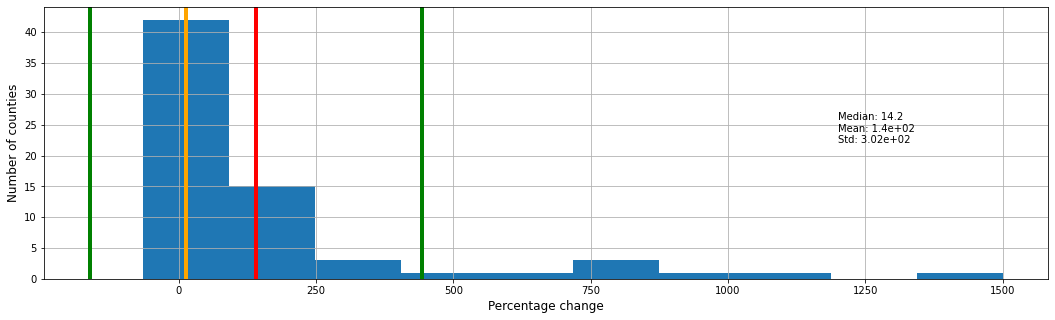

In [92]:
figure_size = [ 18, 5 ]
fig_1, ax = plt.subplots()

trump_rallies[ 'percent_change' ].hist( figsize = figure_size )

plt.ylabel("Number of counties",fontsize=12)
plt.xlabel("Percentage change",fontsize=12)
# plt.title('Post-Rally COVID-19 Spread', fontsize=15)
#
# Summary statistics: mean and std
#
mean_change = trump_rallies[ 'percent_change' ].mean()
std_change = trump_rallies[ 'percent_change' ].std()
median_change = trump_rallies[ 'percent_change' ].median()

s = "Median: {0:.3}\nMean: {1:.3}\nStd: {2:.3}".format( median_change, mean_change, std_change)
plt.text(1200, 22, s )

#
# Indicate mean and std with vertical lines
#
plt.axvline(x=median_change, color='orange', linewidth = 4)
plt.axvline(x=mean_change, color='red', linewidth = 4)
plt.axvline(x=mean_change + std_change, color='green', linewidth = 4)
plt.axvline(x=mean_change - std_change, color='green', linewidth = 4)

Persist this figure and the augmented dataframe for Trump's rallies.

In [93]:
fig_1.savefig( "viz/hist-counties-by-percent-change.png", bbox_inches = 'tight' )
trump_rallies.to_csv( 'data/trump-rallies-augmented.csv', index_label = 'Id' )

# Geospatial plots #

Derive a smaller geo-dataframe that we will use for the geospatial plots.

In [108]:
#
# Drop unecessary columns
#
trump_rally_locations = trump_rallies.drop( ["Date", "State", "County", "Combined_Key", "Population", "deaths_prior", "deaths_after" ], axis = 1 )

# 
# Create mappable Points from the Lat and Long_ columns
#
trump_rally_geo_points = [Point( xy ) for xy in zip( trump_rally_locations[ "Long_" ], trump_rally_locations[ "Lat" ] ) ]

#
# Create the geo-dataframe using geopandas
#
trump_rally_locations_geo = gpd.GeoDataFrame( trump_rally_locations, crs = "EPSG:4326", geometry = trump_rally_geo_points )

trump_rally_locations_geo.head()

,City,Lat,Long_,percent_change,geometry
0,Tulsa,36.119396,-95.940139,-13.79,POINT (-95.94014 36.11940)
1,Phoenix,33.348359,-112.491815,268.14,POINT (-112.49182 33.34836)
2,Mankato,44.035542,-94.066998,0.00,POINT (-94.06700 44.03554)
3,Oshkosh,44.068869,-88.644771,-50.00,POINT (-88.64477 44.06887)
4,Yuma,32.768957,-113.906667,-64.29,POINT (-113.90667 32.76896)


In [ ]:
us_map = gpd.read_file( "data/tl_2019_us_state/tl_2019_us_state.shp" )
fig, ax = plt.subplots( figsize = ( 30, 30 ))
ax.set_xlim(-128, -65)
ax.set_ylim(22, 51)
us_map.plot( ax = ax )

trump_rally_locations_geo.plot( ax = ax, color = "yellow" )

In [123]:
trump_rally_locations.to_csv( 'data/trump-rally-locations.csv', index_label = 'Id' )

# Acknowledgements #

Resources that I learned from while producing this notebook.

## Constants in Python ##
Guidance on emulating constants in Python from Jonathan Hsu at [Medium](https://medium.com/better-programming/does-python-have-constants-3b8249dc8b7b)

## GeoPandas ##

_GeoPandas 101: Plot any data with a latitude and longitude on a map_ by Ryan Stewart at [TowardsDataScience](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972)

GeoPandas install [documentation](https://geopandas.org/install.html)

### --- END --- ###